## Project 1

Generate series of 100 random numbers using randn(). Calculate number of sequences which contain as minimum 3 increasing numbers. Example: 7, 8,2, 3, 4, 5, 8, 11, 12, 1, 0. There is one increasing sequence: 2, 3, 4, 5, 8, 11, 12 which has 7 members. Indicate its position and length.

In [1]:
import numpy as np ## library with randn function

v = np.random.randn(100) ## I generated a vector with 100 random numbers from the standard normal distribution

seq = [] ## I created a list for storing sequences
starting_point = 0 ## This is for indexing sequences

for i in range(1, len(v)): ## I iterate through 1 to 100
    if v[i] > v[i-1]: ## If number in vector "v" at position "i" is bigger than on position "i-1" then the for loop advances towards i+1 (because i am interested in where the i is smaller and sequence of increasing numbers ends)
        continue ## this command advances to i+1 and ignores the rest of the code in the loop
    else: ## If the first if condition is not satisfied do the code under
        if i - starting_point >= 3: ## I analyze whether the sequence I just went through is atleast 3 numbers long
            seq.append([starting_point, i - starting_point]) ## If so, append to seq list a new member consisting of starting position of the sequence and its length
        starting_point = i ## update new starting point to i
if len(v) - starting_point >= 3: ## this is for sequences that would appear towards the end of the "v" vector. If the last 3 numbers were increasing, it wouldn't appear with the loop i presented earlier 
    seq.append([starting_point, len(v) - starting_point])

print(seq) ## print results
print(v) ## print "v" so its possible to check correctness of the result (indexing in Python starts from 0)

[[5, 3], [15, 3], [19, 6], [28, 3], [35, 3], [42, 3], [51, 3], [56, 4], [69, 3], [74, 4], [83, 3], [94, 3]]
[ 0.00700361 -0.96868557 -0.8609523  -1.57287529 -0.13977229 -0.74634845
  0.14930821  0.57943641  0.27844003  0.8061992   0.04495658  1.64380766
 -0.97220149 -1.26742962 -0.14016471 -0.92989926 -0.71639472  0.45258908
  0.37910072 -1.41634986 -1.09476635  0.06114014  0.76319582  0.92697872
  1.1609376  -0.29932955  0.64149055  0.38692989 -0.41523871 -0.01468591
  0.53310901 -0.34043895  0.38104223  0.12029422  1.42934502 -0.81061237
 -0.25833055  0.94316845 -0.65918864 -0.95206995  1.30594955  0.870333
 -0.8079626  -0.20379936  0.4001295  -1.79260003  1.08939603 -1.52551726
  0.24991614 -0.30303064  0.54367808 -1.07425694  0.1178985   1.13802659
 -0.28528163 -0.12744683 -1.31714729 -0.99948901  0.3272429   0.90556895
  0.74230898  0.41951483 -0.81278541  1.50605112  0.65827125 -3.1791554
  1.62436147  1.10008117  0.04664263 -1.50178416  0.24264396  1.58381587
  0.15202694 -0.107

## Project 1

Apply an algorithm to the price development of the selected share. Import price development into Matlab from Yahoo Finance, for example. Try to reasonably define ascending and descending trends. Recommendation: Use daily time series smoothing.Rate whether there are more upward or upward trends in the development and what their average length is.

In [2]:
import yfinance as yh ## library for operating on yahoo finance database
import numpy as np
data = yh.download('IBM') ## download of data for IBM stock

close = data['Close'] ## extracting closing price data
w = 60 ## window size for moving average (2 months)
close_mean = np.zeros_like(close) ## initializing of a array for moving average storing

for i in range(w, len(close)): ## go through the closing prices and count moving average using window size "w"
    close_mean[i] = np.mean(close[i - w + 1 : i + 1])

increasing_sequence = [] ## array for increasing sequences
decreasing_sequence = [] ## array for decreasing sequences
starting_point = 1 ## this is for indexing the sequences

## I do 2 different loops for decreasing and increasing trends. It could be for sure implemented as 1 loop (and it would be probably more resource efficient), but for me personally, it is more readable when separated

for i in range(1, len(close_mean)): ## go through the close mean
    if close_mean[i] > close_mean[i - 1]: ## If number in vector "close_mean" at position "i" is bigger than on position "i-1" then the for loop advances towards i+1 (because I am interested in where the i is smaller and sequence of increasing numbers ends)
        continue ## this command advances to i+1 and ignores the rest of the code in the loop
    else: ## If the first if condition is not satisfied do the code under
        if i - starting_point >= 90: ## I analyze whether the sequence I just went through is atleast 90 numbers long (so there is 90 days increasing trend)
            increasing_sequence.append([starting_point, i - starting_point]) ## If so, append to seq list a new member consisting of starting position of the sequence and its length
        starting_point = i ## update new starting point to i
if len(close_mean) - starting_point >= 90: ## this is for sequences that would appear towards the end of the "close_mean" vector. If the last 90 numbers were increasing, it wouldn't appear with the loop i presented earlier 
    increasing_sequence.append([starting_point, len(close_mean) - starting_point])

starting_point = 1 ## reset starting point, so I can analyze decreasing trends

for i in range(1, len(close_mean)): ## go through the close mean
    if close_mean[i] < close_mean[i - 1]: ## If number in vector "close_mean" at position "i" is smaller than on position "i-1" then the for loop advances towards i+1 (because I am interested in where the i is bigger and sequence of decreasing numbers ends)
        continue ## this command advances to i+1 and ignores the rest of the code in the loop
    else: ## If the first if condition is not satisfied do the code under
        if i - starting_point >= 90: ## I analyze whether the sequence I just went through is atleast 90 numbers long (so there is 90 days decreasing trend)
            decreasing_sequence.append([starting_point, i - starting_point]) ## If so, append to seq list a new member consisting of starting position of the sequence and its length
        starting_point = i## update new starting point to i
if len(close_mean) - starting_point >= 90: ## this is for sequences that would appear towards the end of the "close_mean" vector. If the last 90 numbers were decreasing, it wouldn't appear with the loop i presented earlier 
    decreasing_sequence.append([starting_point, len(close_mean) - starting_point])

increasing_prices_length = np.array(increasing_sequence)[:,1] ## extract just lengths
decreasing_prices_length = np.array(decreasing_sequence)[:,1] ## extract just lengths

increasing_mean_length = np.mean(increasing_prices_length) ## mean of lengths
decreasing_mean_length = np.mean(decreasing_prices_length) ## mean of lengths

number_of_inc_sequences = len(increasing_sequence) ## number of sequences
number_of_dec_sequences = len(decreasing_sequence) ## number of sequences

print(f'There are {number_of_inc_sequences} increasing trends and {number_of_dec_sequences} decreasing trends. Average length of increasing sequence is: {increasing_mean_length}. Average length of decreasing lenght is: {decreasing_mean_length}.')

[*********************100%%**********************]  1 of 1 completed
There are 29 increasing trends and 20 decreasing trends. Average length of increasing sequence is: 130.31034482758622. Average length of decreasing lenght is: 123.95.


## Project 2
Simulation of a price development. Number of path = 1000, S0 = 100 // initialprice, μ = 0.3, σ= 0.2, N = 90 // mumberofdays 
1. Simulate and display 1000 path by implementing equation:dSt= μStdt+ σStdWt
2. Use “dfittool” and display the distribution of price after 90 days

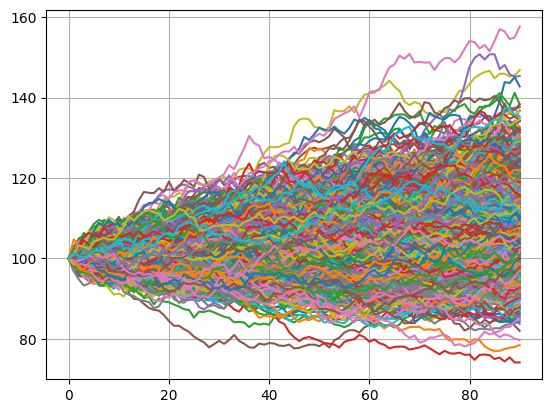

<Axes: ylabel='Density'>

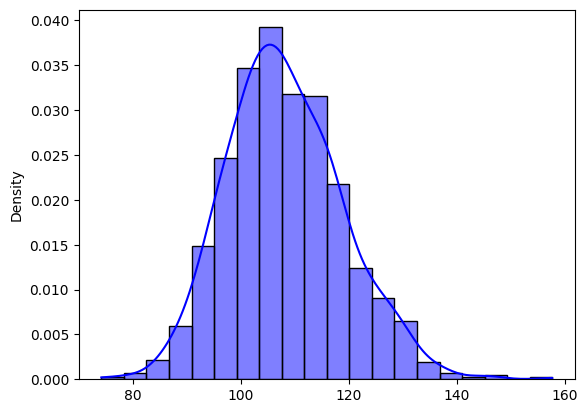

In [3]:
import numpy as np ## library for manipulating with data
import matplotlib.pyplot as mat ## library for plotting
import seaborn as sb
## constants from the task
number_of_paths = 1000
s0 = 100
mi = 0.3
sigma = 0.2
T = 1 / 4
n = 90
dt = T / n

paths = np.zeros((number_of_paths, n + 1)) ## initialization of an array to store paths (number of paths - number of rows; n+1 = columns)
paths[:, 0] = s0 ## intitializing first column of each row with initial price of 100

for h in range(number_of_paths): ## go through each row
    counter = 1 ## set counter for indexing the steps
    S = np.zeros(n + 1) ## initializing vector for steps
    S[0] = s0 ## initializing first value with s0 (100)

    for x in range(n): ## for every step
        dw = np.sqrt(dt) * np.random.randn(1) ## calculates dW
        ds = mi * S[counter - 1] * dt + sigma * S[counter - 1] * dw ## calculate change in price according to the formula from task
        S[counter] = S[counter - 1] + ds ## assign the calculated value in S vector
        counter += 1 ## add 1 to the counter

        paths[h, :] = S ## assign values from S vector to the "h" row ("h"th path)


final_prices = paths[:, -1] ## for distribution
mat.grid(True) ## turns on the grid

for h in range(number_of_paths): ## plots all paths
    mat.plot(np.arange(n + 1), paths[h, :]) ## plots every column of each path

mat.show() ## displays the plot for paths
sb.histplot(final_prices, kde=True, bins=20, color='blue', stat='density')## distribution of prices after 90 days



Apply to a real stock market development. Calculate σ and µ based on historical development. Display prediction of average price development and also expected 90% future price development interval.

[*********************100%%**********************]  1 of 1 completed
90% Prediction Interval: (140.33, 220.29)


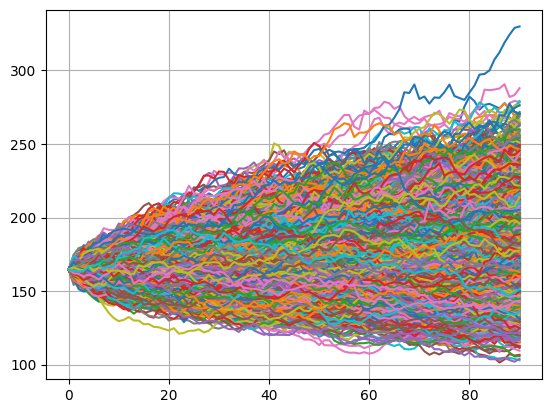

0.09800469870778333
0.2769986864173179
164.7100067138672


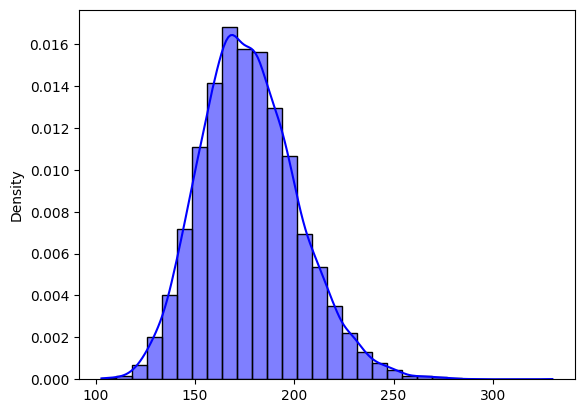

In [4]:
import numpy as np
import yfinance as yh
import matplotlib.pyplot as mat ## library for plotting

data = yh.download('IBM')
close = data['Close']


number_of_paths = 10000
close = np.array(close)
close = close[9999:]
close_diff = np.diff(close[999:])
prev_price = close[999:-1]
mu = np.mean(close_diff / prev_price) * 365
sigma = np.std(close_diff / prev_price) * np.sqrt(365)
T = 1 / 4
n = 90
dt = T / n
paths = np.zeros((number_of_paths, n + 1)) ## initialization of an array to store paths (number of paths - number of rows; n+1 = columns)
paths[:, 0] = close[-1] ## intitializing first column of each row with initial price of 100

for h in range(number_of_paths): ## go through each row
    counter = 1 ## set counter for indexing the steps
    S = np.zeros(n + 1) ## initializing vector for steps
    S[0] = close[-1] ## initializing first value with s0 (100)
    for x in range(n): ## for every step
        dw = np.sqrt(dt) * np.random.randn(1) ## calculates dW
        ds = mi * S[counter - 1] * dt + sigma * S[counter - 1] * dw ## calculate change in price according to the formula from task
        S[counter] = S[counter - 1] + ds ## assign the calculated value in S vector
        counter += 1 ## add 1 to the counter

    paths[h, :] = S ## assign values from S vector to the "h" row ("h"th path)

final_prices = paths[:, -1] ## for distribution
mat.grid(True) ## turns on the grid
for h in range(number_of_paths): ## plots all paths
    mat.plot(np.arange(n + 1), paths[h, :]) ## plots every column of each path
percentile_5 = np.percentile(final_prices, 5) ## percentiles
percentile_95 = np.percentile(final_prices, 95) ## percentiles
print(f'90% Prediction Interval: ({percentile_5:.2f}, {percentile_95:.2f})') ## print prediciton 90% interval
mat.show() ## displays the plot for paths
sb.histplot(final_prices, kde=True, bins=30, color='blue', stat='density')## distribution of prices after 90 days
print(mu) ## calculated mu
print(sigma) ## calculated sigma
print(close[-1]) ## last price from history

# Project 3
Using the equation below, display the chart of a price development over time. Coupon
period =1 year, T=365. Inputs from keyboard: maturity, coupon rate, YTM (for example
maturity=30, coupon rate=5, YTM=0.02):
**equation**
where P is the dirty price of a bond in the percentage of its face value on purchasing day, c
is the coupon rate per the coupon period, YTM is the yield to maturity per the coupon
period, d is the number of days between the first coupon payment and the purchasing day,
n is the number of coupon payments till the maturity and T is the number of days inside
the coupon period. Presumption-YTM is of constant value from now till maturity

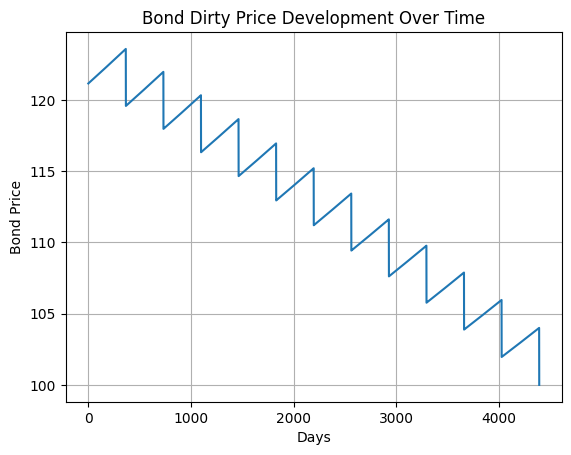

In [5]:
import matplotlib.pyplot as plt

period = 365 ## period
maturity = int(input("Maturity in years: "))
coupon_rate = int(input("Coupoun rate: "))
ytm = float(input("YTM: "))
d = 365 ## initializing the days between first coupon payment and purchasing day


prices = [] ## initializing prices

for i in range(maturity, 0,-1): ## go through years
    for x in range(d,-1,-1): ## go through days
        price = (1+ytm)*((1+(x/period)*ytm)**(-1))*(coupon_rate*((1-(1+ytm)**(-i))/ytm)+(100/((1+ytm)**i))) ## use equation for dirty price
        prices.append(price)
prices.append((1+ytm)*((1+(d/period)*ytm)**(-1))*(coupon_rate*((1-(1+ytm)**(-0))/ytm)+(100/((1+ytm)**0)))) ## add final price


days = list(range(1,len(prices)+1)) ## days for the plot

plt.plot(days, prices)
plt.title('Bond Dirty Price Development Over Time')
plt.xlabel('Days')
plt.ylabel('Bond Price')
plt.grid(True)
plt.show()




# Project 6
The daily price development is represented by a 100-step Random Walk( RW). After every 1000 days, the size of the stepof this RWRW, which is defined in Matlab as step=A*randn(1) in CZK, changes and A takes the value {2, 10, 3, 7, 1}
1.
Verify that the daily price distribution is not Gaussian, but a leptokurtic one, using dfittool() and kurtosis().
2.
Plot a time series of step sizes over a time period of 5000 days, plot a mix of 5000 random walks of 100 steps.
3.
What is the daily VAR in CZK at Confidence Levels 90, 95 and 99%? Use
prctile () function on simulated

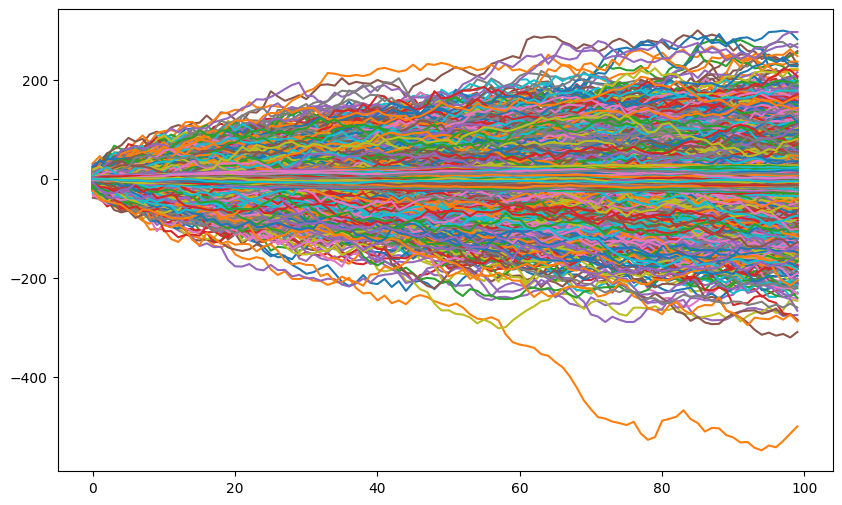

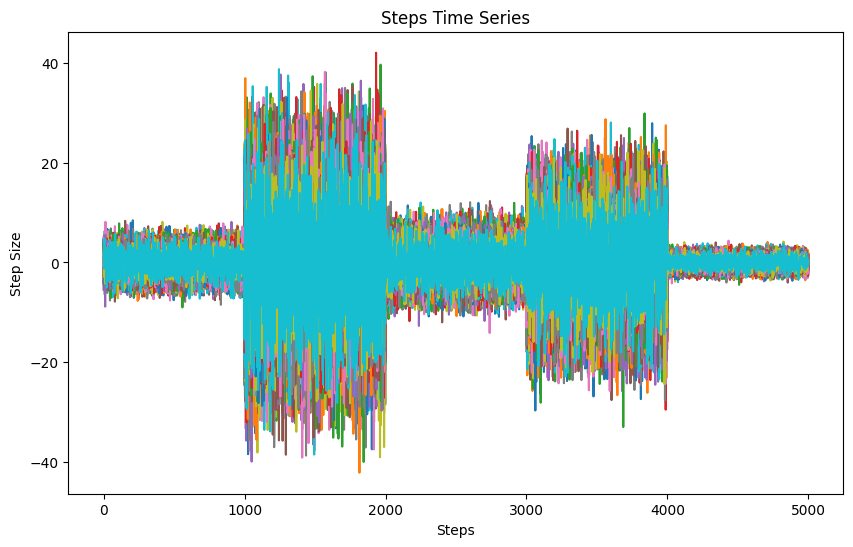

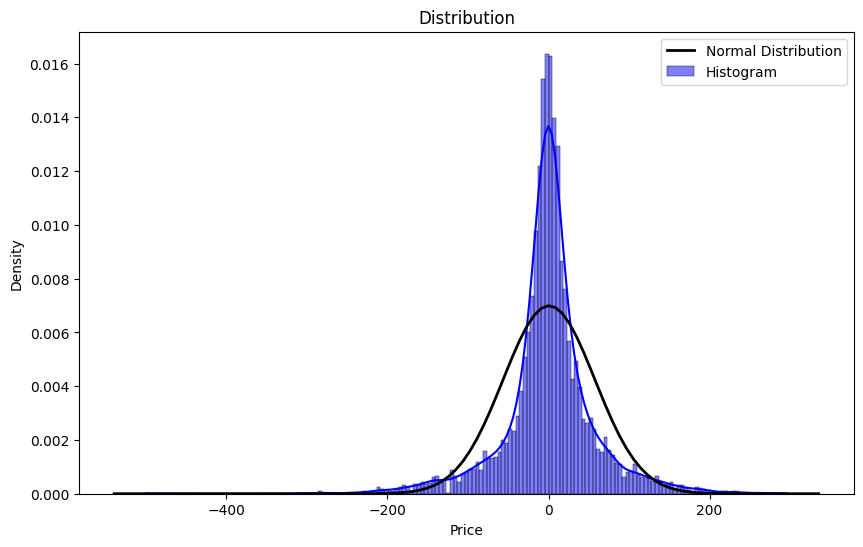

Kurtosis: 4.980804059166282
Kurtosis Test Statistic: 23.526115989803387
Kurtosis Test p-value: 2.2047484482669344e-122
VAR at 0.9 confidence level:-29.97065104733787
VAR at 0.95 confidence level:-66.83282148786972
VAR at 0.99 confidence level:-293.09569584965317


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, norm, kurtosistest
import seaborn as sns
import pandas as pd

steps = np.zeros((5000, 100)) ## initializing array for random walks

## here i define different step sizes
steps[0:1000, :] = 2 * np.random.randn(1000, 100)
steps[1000:2000, :] = 10 * np.random.randn(1000, 100) 
steps[2000:3000, :] = 3 * np.random.randn(1000, 100) 
steps[3000:4000, :] = 7 * np.random.randn(1000, 100) 
steps[4000:5000, :] = 1 * np.random.randn(1000, 100) 

walks = np.cumsum(steps, axis=1) ## creating RW

plt.figure(figsize=(10, 6))
for i in range(walks.shape[0]):
    plt.plot(walks[i, :], label=f'Walk {i + 1}') ## plotting random walks


## plotting steps sizes over time
plt.figure(figsize=(10, 6))
plt.plot(steps)
plt.title('Steps Time Series')
plt.xlabel('Steps')
plt.ylabel('Step Size')
plt.show()


last_column_values = walks[:, -1] #get the prices after each day
fitted_distribution = norm.fit(last_column_values) ## fit normal distribution
# Plot the histogram and the fitted normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(last_column_values, kde=True, stat='density', color='blue', label='Histogram') ## plot prices
xmin, xmax = plt.xlim() ## limits for plot
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, *fitted_distribution) # line for normal distribution
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution') ## plotting
plt.title('Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()


kurt = kurtosis(last_column_values)
print(f'Kurtosis: {kurt}') ## kurtosis (if above 3 it is most likely leptokurtic)

kurtosis_test_statistic, kurtosis_test_p_value = kurtosistest(last_column_values) ## this is to confirm that it its leptokurtic and not normal
print(f'Kurtosis Test Statistic: {kurtosis_test_statistic}')
print(f'Kurtosis Test p-value: {kurtosis_test_p_value}')


first_column_values = walks[:, 0]
df = pd.DataFrame()
df['first'] = first_column_values
df['last'] = last_column_values
df['returns'] = (df['last']/df['first'])-1

## VAR at different confdence levels
q_90=df['returns'].quantile(0.1)
q_95=df['returns'].quantile(0.05)
q_99=df['returns'].quantile(0.01)
print(f'VAR at 0.9 confidence level:{q_90}')
print(f'VAR at 0.95 confidence level:{q_95}')
print(f'VAR at 0.99 confidence level:{q_99}')


# Project 5    
Choose
2 shares A&B with higher correlation Could be from the same industrial branch Test the
success of the Trading of Pairs strategy with back testing on daily data Present the results using both
win/ratio and PL Here's example how to do it
1.
The current price ratio B/A is now e.g., 0.48, and this current ratio calculate for each day.
Calculate also:
a)
the moving average of the price ratio
b)
the standard deviation of the price ratio values, e.g. 0.03.
2.
Entry to the position:
a)
B/A < (0.48
2*0.03) long B, short A, (“enter on two standard deviations”)
b)
B/A > (0.48+2*0.03) short B, long A, (
(------////------)).
3.
Close the position when the ratio returns to the current (e.g. 15
day) moving
average or after certain number of days (e.g. 5) 5).
4.
Use the Chaotic Trader to compare the results of the win ratio=
ratio=(number of successes successes)//(number
of all open positions positions).

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd

window_size = 15 

dataDHI = yf.download('DHI')
dataLEN = yf.download('LEN')

closeDHI = dataDHI['Close']
closeLEN = dataLEN['Close']

closeDHI=closeDHI[-2000:] ## take only some part of the list
closeLEN=closeLEN[-2000:]

correlation_matrix = np.corrcoef(closeDHI, closeLEN)

correlation_coefficient = correlation_matrix[0, 1] ## this is where correlation coef is in the matrix

print(f"Correlation Coefficient: {correlation_coefficient}")

df = pd.DataFrame()
df['DHI'] = closeDHI
df['LEN'] = closeLEN
df['price_ratio'] = df['DHI']/df['LEN']
df['moving_average'] = df['price_ratio'].rolling(window=window_size).mean()
df['std'] = df['price_ratio'].rolling(window=window_size).std() ## std is also "moving"


win_counter = 0
win_ran_counter = 0
position_counter = 0
prlo = 0
win_ratio=0
win_ran_ratio=0
ran_prlo = 0

for i in range(window_size,len(df)-14):
    price_r = df['price_ratio'][i] ## always take the current value
    mov_avg = df['moving_average'][i]
    std = df['std'][i]

    if price_r < (mov_avg-2*std): ## identify some deviation
        position_counter += 1 ## open position
        random_numberDHI = np.random.randn() ## below is code for chaotic trader
        random_numberLEN = np.random.randn()
        if random_numberDHI > 0 and random_numberLEN < 0 and ((df['DHI'][i+15]-df['DHI'][i]) + (df['LEN'][i]-df['LEN'][i+15])) > 0:
            win_ran_counter +=1
        if random_numberDHI > 0 and random_numberLEN > 0 and ((df['DHI'][i+15]-df['DHI'][i]) + (df['LEN'][i+15]-df['LEN'][i])) > 0:
            win_ran_counter +=1 
        if random_numberDHI < 0 and random_numberLEN > 0 and ((df['DHI'][i]-df['DHI'][i+15]) + (df['LEN'][i+15]-df['LEN'][i])) > 0:
            win_ran_counter +=1   
        if random_numberDHI < 0 and random_numberLEN < 0 and ((df['DHI'][i]-df['DHI'][i+15]) + (df['LEN'][i]-df['LEN'][i+15])) > 0:
            win_ran_counter +=1     
        for j in range(i+1,i+16): ## day counter
            price_rj = df['price_ratio'][j]
            mov_avgj = df['moving_average'][j]
            stdj = df['std'][j]
            if price_rj > (mov_avgj-2*stdj) or j == i+15: ## if price goes back to the average or the daycounter hits the limit
                if ((df['DHI'][j]-df['DHI'][i]) + (df['LEN'][i]-df['LEN'][j])) > 0:
                    win_counter += 1
                    prlo += (df['DHI'][j]-df['DHI'][i]) + (df['LEN'][i]-df['LEN'][j])
                    break
                prlo += (df['DHI'][j]-df['DHI'][i]) + (df['LEN'][i]-df['LEN'][j]) ## this is if there is loss
                
    ## same logic but inverse
    if price_r > (mov_avg + 2*std):
        position_counter += 1
        random_numberDHI = np.random.randn()
        random_numberLEN = np.random.randn()
        if random_numberDHI > 0 and random_numberLEN < 0 and ((df['DHI'][i+15]-df['DHI'][i]) + (df['LEN'][i]-df['LEN'][i+15])) > 0:
            win_ran_counter +=1
        if random_numberDHI > 0 and random_numberLEN > 0 and ((df['DHI'][i+15]-df['DHI'][i]) + (df['LEN'][i+15]-df['LEN'][i])) > 0:
            win_ran_counter +=1 
        if random_numberDHI < 0 and random_numberLEN > 0 and ((df['DHI'][i]-df['DHI'][i+15]) + (df['LEN'][i+15]-df['LEN'][i])) > 0:
            win_ran_counter +=1   
        if random_numberDHI < 0 and random_numberLEN < 0 and ((df['DHI'][i]-df['DHI'][i+15]) + (df['LEN'][i]-df['LEN'][i+15])) > 0:
            win_ran_counter +=1 
        for j in range(i+1,i+15):
            price_rj = df['price_ratio'][j]
            mov_avgj = df['moving_average'][j]
            stdj = df['std'][j]
            if price_rj < (mov_avgj-2*stdj) or j == i+14:
                if ((df['DHI'][i]-df['DHI'][j]) + (df['LEN'][j]-df['LEN'][i])) > 0:
                    win_counter += 1
                    prlo += (df['DHI'][i]-df['DHI'][j]) + (df['LEN'][j]-df['LEN'][i])
                    break
                prlo += (df['DHI'][i]-df['DHI'][j]) + (df['LEN'][j]-df['LEN'][i])

win_ratio = win_counter/position_counter 
win_ran_ratio = win_ran_counter/position_counter               
print(f'Win ratio: {win_ratio}')
print(f'Win ratio of chaotic trader: {win_ran_ratio}')
print(f'PL in currency: {prlo}')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Correlation Coefficient: 0.988293189135515
Win ratio: 0.7272727272727273
Win ratio of chaotic trader: 0.5454545454545454
PL in currency: -154.39199256896973


# Project 7
1.
Fit
stock price series to ARIMA(
Use functions:
model= arima (1,1,1);
fit = estimate(model, stock_price_series
2. Figure the result of simulation of 100 possible future path of 500 steps each
in accordance with the ARIMA(1,1,1) model that follow historical developments.
Use functions:
[Y,E] = simulate( 500 'numPaths‘,10 100 ' Close);
3. Display the 95% interval in the figure, where the future development and the mean value of the expected development will be located.
Use function prctile();
4. Also try to use function forecast ()();

In [8]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import yfinance as yf
import statsmodels.api as sm

data = yf.download('IBM', start='2022-01-01', end='2023-01-01')
closing_prices = data['Close']


order = (1, 1, 1)
model = sm.tsa.SARIMAX(closing_prices, order=order, trend='c')
results = model.fit() ## fitting th emodel


num_paths = 100
future_path_length = 500
initial = results.smoothed_state[:, 0] ## starting point for the prediction
simulated_paths = results.simulate(future_path_length, repetitions=num_paths, initial_state=initial)


future_dates = pd.date_range(start='2022-12-30', periods=future_path_length) ## for indexing


trace_historical = go.Scatter(x=closing_prices.index, y=closing_prices, mode='lines', name='Historical Data', line=dict(color='blue'))
traces_simulated = [go.Scatter(x=future_dates, y=simulated_paths.iloc[:, i], mode='lines', name=f'Simulated Path {i + 1}', line=dict(color=f'#{"".join([format(int(val * 255), "02x") for val in np.random.rand(3)])}', width=1)) for i in range(num_paths)] ##every line in different color

## mean path and confidence itervals
mean_path = simulated_paths.mean(axis=1)
confidence_interval_low = simulated_paths.quantile(0.025, axis=1)
confidence_interval_high = simulated_paths.quantile(0.975, axis=1)

# plotting mean and confidence
trace_mean = go.Scatter(x=future_dates, y=mean_path, mode='lines', name='Mean Path', line=dict(color='black', width=3))
trace_low = go.Scatter(x=future_dates, y=confidence_interval_low, mode='lines', name='95% Confidence Interval ', line=dict(color='red', width=5, dash='dash'))
trace_high = go.Scatter(x=future_dates, y=confidence_interval_high, mode='lines', name='95% Confidence Interval', line=dict(color='red', width=5, dash='dash'))


traces = [trace_historical] + traces_simulated + [trace_mean, trace_low, trace_high]


layout = go.Layout(title='Historical Data, Simulated Paths, Mean Path, and 95% Confidence Interval', xaxis=dict(title='Date'), yaxis=dict(title='Closing Price'), showlegend=True)


fig = go.Figure(data=traces, layout=layout)


fig.show()


[*********************100%%**********************]  1 of 1 completed


c:\Users\janho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\janho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\janho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\janho\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the 

# Project 4
Construct and displaya set of all portfolios from 3 assets Use daily data for at
least half a year Consider that the weights will gain value from 0 to 100 with a
step of 1 Display risk and return as annualized
2.
Determine the yield with the minimal
risk and highlight the effective frontier.

[*********************100%%**********************]  3 of 3 completed


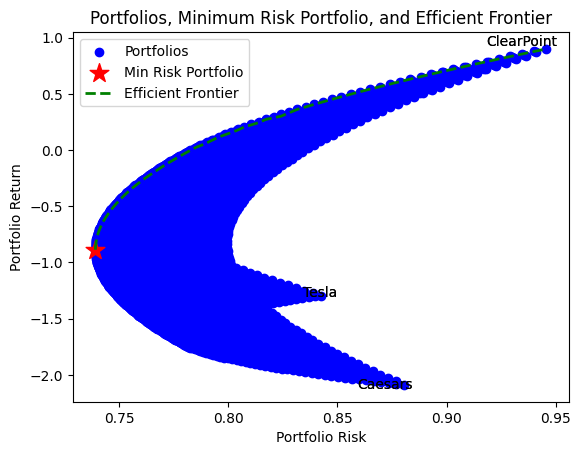

Portfolio with Minimal Risk:
{'Return': -0.8869591532621951, 'Risk': 0.7391178143641071, 'Weights': array([0.29, 0.28, 0.43])}


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

stocks = {'CZR': 'Caesars', 'TSLA': 'Tesla', 'CLPT': 'ClearPoint'}

data = yf.download(list(stocks.keys()), start='2022-01-01', end='2022-06-30')['Close']


returns_df = data.pct_change().dropna() ## daily returns


portfolios = []
min_risk_portfolio = None 
min_risk = float('inf') 

for weight_a in range(1, 101):  # ensure at least 1 stock in the portfolio
    for weight_b in range(1, 101 - weight_a):
        weight_c = 100 - weight_a - weight_b
        weights = np.array([weight_a, weight_b, weight_c]) / 100.0
        weights /= np.sum(weights)  # ensure weights sum up to 1

        
        portfolio_return = np.sum(weights * returns_df.mean()) * 365  # annualized return
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns_df.cov() * 365, weights))) ## annualized risk

        portfolios.append({'Return': portfolio_return, 'Risk': portfolio_volatility, 'Weights': weights})

        # update min_risk_portfolio if current portfolio has lower risk
        if portfolio_volatility < min_risk:
            min_risk = portfolio_volatility
            min_risk_portfolio = {'Return': portfolio_return, 'Risk': portfolio_volatility, 'Weights': weights}

portfolios_df = pd.DataFrame(portfolios)


plt.scatter(portfolios_df['Risk'], portfolios_df['Return'], c='blue', marker='o', label='Portfolios') ## portfolio plot
plt.scatter(min_risk_portfolio['Risk'], min_risk_portfolio['Return'], marker='*', color='red', s=200, label='Min Risk Portfolio') ## minimum risk portfolio


for asset_ticker, asset_name in stocks.items():
    plt.text(returns_df.std().loc[asset_ticker] * np.sqrt(365), returns_df.mean().loc[asset_ticker] * 365, asset_name, ha='right')

## efficient frontier
returns_range = np.linspace(portfolios_df['Return'].min(), portfolios_df['Return'].max(), 100)
efficient_frontier = []

for expected_return in returns_range:
    
    fportfolios = portfolios_df[portfolios_df['Return'] >= expected_return]

    if not fportfolios.empty:
        min_risk_portfolio_efficient = fportfolios.loc[fportfolios['Risk'].idxmin()]

        efficient_frontier.append({'Return': min_risk_portfolio_efficient['Return'], 'Risk': min_risk_portfolio_efficient['Risk']})


efficient_frontier_df = pd.DataFrame(efficient_frontier)

portfolios_df = portfolios_df.sort_values(by='Risk')

plt.plot(efficient_frontier_df['Risk'], efficient_frontier_df['Return'], linestyle='dashed', color='green', linewidth=2, label='Efficient Frontier')
plt.title('Portfolios, Minimum Risk Portfolio, and Efficient Frontier')
plt.xlabel('Portfolio Risk')
plt.ylabel('Portfolio Return')

for asset_ticker, asset_name in stocks.items():
    plt.text(returns_df.std().loc[asset_ticker] * np.sqrt(365), returns_df.mean().loc[asset_ticker] * 365, asset_name, ha='right')

plt.legend()
plt.show()

print("Portfolio with Minimal Risk:")
print(min_risk_portfolio)
